In [1]:
import boto3, os, sagemaker
from sagemaker import get_execution_role

iam_role = get_execution_role()

my_region = boto3.Session().region_name

sm_session = sagemaker.session.Session(boto3.Session())

print("Success")

Success


In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

adult = pd.read_csv("s3://bigdatabhawna/finalproject/adult.data", header=None, delimiter=r",\s+")
adult.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


0                 1       2          3   4                   5   \
0  39         State-gov   77516  Bachelors  13       Never-married   
1  50  Self-emp-not-inc   83311  Bachelors  13  Married-civ-spouse   
2  38           Private  215646    HS-grad   9            Divorced   
3  53           Private  234721       11th   7  Married-civ-spouse   
4  28           Private  338409  Bachelors  13  Married-civ-spouse   

                  6              7      8       9     10  11  12  \
0       Adm-clerical  Not-in-family  White    Male  2174   0  40   
1    Exec-managerial        Husband  White    Male     0   0  13   
2  Handlers-cleaners  Not-in-family  White    Male     0   0  40   
3  Handlers-cleaners        Husband  Black    Male     0   0  40   
4     Prof-specialty           Wife  Black  Female     0   0  40   

              13     14  
0  United-States  <=50K  
1  United-States  <=50K  
2  United-States  <=50K  
3  United-States  <=50K  
4           Cuba  <=50K

In [3]:
cols = {
    "age": "continuous",
    "workclass": "Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked",
    "fnlwgt": "continuous",
    "education": "Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool",
    "education-num": "continuous",
    "marital-status": "Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse",
    "occupation": "Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces",
    "relationship": "Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried",
    "race": "White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black",
    "sex": "Female, Male",
    "capital-gain": "continuous",
    "capital-loss": "continuous",
    "hours-per-week": "continuous",
    "native-country": "United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands",
    "income": ">50K, <=50K",
}

with open('cols_dict.pickle', 'wb') as f:
    pickle.dump(cols, f, protocol=pickle.HIGHEST_PROTOCOL)

In [4]:
cols_dict = pickle.load(open('cols_dict.pickle', 'rb'))

In [5]:
adult.columns = [cols for cols in cols_dict.keys()]

In [6]:
adult.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [7]:
dtypes = {
    "age": int,
    "workclass": str,
    "fnlwgt": int,
    "education": str,
    "education-num": int,
    "marital-status": str,
    "occupation": str,
    "relationship": str,
    "race": str,
    "sex": str,
    "capital-gain": int,
    "capital-loss": int,
    "hours-per-week": int,
    "native-country": str,
    "income": str
}

adult = adult.astype(dtypes)

In [8]:
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [9]:
adult.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [10]:
for x in range(len(list(adult.columns))):
    print("{} number of missing values in column {}".format(sum((adult.iloc[:,x]).astype('str').str.contains('\?')), 
          list(adult.columns)[x]))

0 number of missing values in column age
1836 number of missing values in column workclass
0 number of missing values in column fnlwgt
0 number of missing values in column education
0 number of missing values in column education-num
0 number of missing values in column marital-status
1843 number of missing values in column occupation
0 number of missing values in column relationship
0 number of missing values in column race
0 number of missing values in column sex
0 number of missing values in column capital-gain
0 number of missing values in column capital-loss
0 number of missing values in column hours-per-week
583 number of missing values in column native-country
0 number of missing values in column income


In [11]:
for x in range(len(list(adult.columns))):
    if sum((adult.iloc[:,x]).astype('str').str.contains('\?')) != 0:
        adult = adult[~adult.iloc[:,x].str.contains("\?")]

In [12]:
for x in range(len(list(adult.columns))):
    print("{} number of missing values in column {}".format(sum((adult.iloc[:,x]).astype('str').str.contains('\?')), 
          list(adult.columns)[x]))

0 number of missing values in column age
0 number of missing values in column workclass
0 number of missing values in column fnlwgt
0 number of missing values in column education
0 number of missing values in column education-num
0 number of missing values in column marital-status
0 number of missing values in column occupation
0 number of missing values in column relationship
0 number of missing values in column race
0 number of missing values in column sex
0 number of missing values in column capital-gain
0 number of missing values in column capital-loss
0 number of missing values in column hours-per-week
0 number of missing values in column native-country
0 number of missing values in column income


In [13]:
len(adult)

30162

### XG Boost Classification

In [14]:
label = adult['income']
features = adult.drop(['income','fnlwgt'], axis = 1)

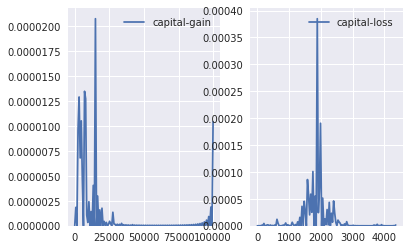

In [15]:
fig, axs = plt.subplots(ncols=2)
sns.kdeplot(features['capital-gain'], ax=axs[0])
sns.kdeplot(features['capital-loss'], ax=axs[1])
plt.show()

In [16]:
var = ['capital-gain', 'capital-loss']
features_new = pd.DataFrame(data = features)
features_new[var] = features[var].apply(lambda x: np.log(x + 1))

In [17]:
features_new = pd.get_dummies(features_new)

In [18]:
features_new.describe()

age  education-num  capital-gain  capital-loss  \
count  30162.000000   30162.000000  30162.000000  30162.000000   
mean      38.437902      10.121312      0.743647      0.355226   
std       13.134665       2.549995      2.470518      1.595010   
min       17.000000       1.000000      0.000000      0.000000   
25%       28.000000       9.000000      0.000000      0.000000   
50%       37.000000      10.000000      0.000000      0.000000   
75%       47.000000      13.000000      0.000000      0.000000   
max       90.000000      16.000000     11.512925      8.379539   

       hours-per-week  workclass_Federal-gov  workclass_Local-gov  \
count    30162.000000           30162.000000         30162.000000   
mean        40.931238               0.031265             0.068530   
std         11.979984               0.174035             0.252657   
min          1.000000               0.000000             0.000000   
25%         40.000000               0.000000             0.000000   
50%         40.000000               0.000000             0.000000   
75%         45.000000               0.000000             0.000000   
max         99.000000               1.000000             1.000000   

       workclass_Private  workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
count       30162.000000            30162.000000                30162.000000   
mean            0.738877                0.035608                    0.082853   
std             0.439254                0.185313                    0.275664   
min             0.000000                0.000000                    0.000000   
25%             0.000000                0.000000                    0.000000   
50%             1.000000                0.000000                    0.000000   
75%             1.000000                0.000000                    0.000000   
max             1.000000                1.000000                    1.000000   

       ...  native-country_Portugal  native-country_Puerto-Rico  \
count  ...             30162.000000                30162.000000   
mean   ...                 0.001127                    0.003614   
std    ...                 0.033556                    0.060007   
min    ...                 0.000000                    0.000000   
25%    ...                 0.000000                    0.000000   
50%    ...                 0.000000                    0.000000   
75%    ...                 0.000000                    0.000000   
max    ...                 1.000000                    1.000000   

       native-country_Scotland  native-country_South  native-country_Taiwan  \
count             30162.000000          30162.000000           30162.000000   
mean                  0.000365              0.002354               0.001392   
std                   0.019094              0.048461               0.037291   
min                   0.000000              0.000000               0.000000   
25%                   0.000000              0.000000               0.000000   
50%                   0.000000              0.000000               0.000000   
75%                   0.000000              0.000000               0.000000   
max                   1.000000              1.000000               1.000000   

       native-country_Thailand  native-country_Trinadad&Tobago  \
count             30162.000000                    30162.000000   
mean                  0.000564                        0.000597   
std                   0.023734                        0.024422   
min                   0.000000                        0.000000   
25%                   0.000000                        0.000000   
50%                   0.000000                        0.000000   
75%                   0.000000                        0.000000   
max                   1.000000                        1.000000   

       native-country_United-States  native-country_Vietnam  \
count                  30162.000000            30162.000000   
mean                       0.911876      

In [19]:
cols = list(adult.columns)
cols = [cols[-1]] + cols[:-1]
adult=adult[cols]


In [20]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(features_new,label,test_size = 0.2,random_state = 1234)  

print("Training set has {} samples.".format(X_train.shape[0])) 
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 24129 samples.
Testing set has 6033 samples.


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # default=(0, 1)
numeric = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

X_train[numeric] = scaler.fit_transform(X_train[numeric])
X_test[numeric] = scaler.fit_transform(X_test[numeric])

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/ec2-u

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 a

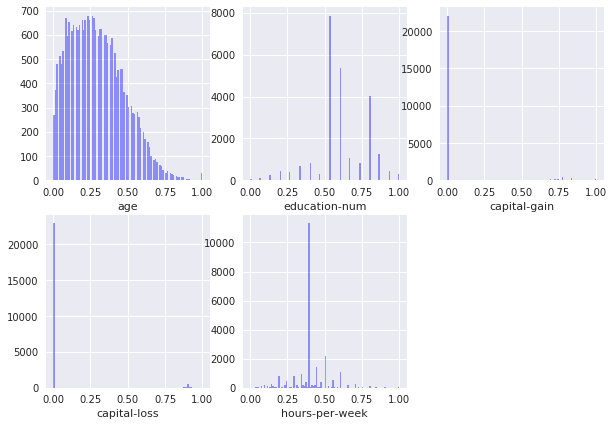

In [22]:
fig=plt.figure(figsize=(10,7))
columns = 3
rows = 2

for i in range(1, 6):
    fig.add_subplot(rows, columns, i)
    sns.distplot(X_train[numeric[i-1]], kde=False, bins=100, color="b")
plt.show()

In [23]:
y_train = y_train.map({'<=50K':0,'>50K':1})
y_test = y_test.map({'<=50K':0,'>50K':1})

In [24]:
features = X_train.columns

In [59]:
x_train = pd.DataFrame(X_train)
x_train['target'] = y_train

x_test_df = pd.DataFrame(X_test)
x_test_df['target'] = y_test

x_train=x_train.values
x_test = x_test_df.values[:,1:]


### Saving train and test files in S3

In [60]:
# save preprocessed data to s3 for XGBoost to access

bucket = "bigdatabhawna"       # CHANGE ME: your own bucket
prefix = "paramodel"   # CHANGE ME: your own folder

datasets = [('train', x_train), ('validation', x_test)]  # Note: also using val as test
data_locations = []
for key, x in datasets:
    file = "{}/{}_data/data.csv".format(prefix,key)
    location = "s3://{}/{}".format(bucket, file); data_locations += [location]
    print('{} data will be uploaded to: {}'.format(key, location))
    np.savetxt("{}.csv".format(key), x, delimiter=',')
    boto3.Session().resource('s3').Bucket(bucket).Object(file).upload_file("{}.csv".format(key))

train data will be uploaded to: s3://bigdatabhawna/paramodel/train_data/data.csv
validation data will be uploaded to: s3://bigdatabhawna/paramodel/validation_data/data.csv


In [61]:
# split test data into chunks separately
import os 
if not os.path.exists("test_split"):
    os.makedirs("test_split")
row_lim = 10000
num_chunks = int((x_test.shape[0] / row_lim) + 1)
for i in range(num_chunks):
    file = "{}/test_data_split/data_{}.csv".format(prefix, i)
    location = "s3://{}/{}".format(bucket, file)
    x_test_chunk = x_test[i*row_lim:(i+1)*row_lim]
    np.savetxt("test_split/data_{}.csv".format(i), x_test_chunk, delimiter=',')
    boto3.Session().resource('s3').Bucket(bucket).Object(file).upload_file("test_split/data_{}.csv".format(i))
test_split_location = 's3://{}/{}/test_data_split'.format(bucket,prefix)
print('Split Test data will be uploaded to: {}'.format(test_split_location))

Split Test data will be uploaded to: s3://bigdatabhawna/paramodel/test_data_split


In [62]:
# set model output location

output_location = "s3://{}/{}/output".format(bucket,prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://bigdatabhawna/paramodel/output


In [63]:
# create input channels to stream data
# NOTE: in the case of using CSV files, all data is saved to the worker containers before training starts;
#       only libsvm supports real data streaming

train_channel = sagemaker.inputs.s3_input(data_locations[0], content_type='text/csv')

data_channels = {'train': train_channel}


### XGBoost using SageMaker

In [64]:
# create the estimator instance

from sagemaker.amazon.amazon_estimator import get_image_uri
training_image = get_image_uri(boto3.Session().region_name, 'xgboost', '0.90-1')
smclient = boto3.Session().client('sagemaker')

xgb_model = sagemaker.estimator.Estimator(training_image,
                                          iam_role, 
                                          train_instance_count=1, 
                                          train_instance_type='ml.m5.xlarge',
                                          train_volume_size = 5,
                                          output_path=output_location,
                                          sagemaker_session=sagemaker.Session())

In [67]:
# set estimator hyperparameters, these will be passed to the XGBoost container

xgb_model.set_hyperparameters(max_depth = 6,
                              eta = .2,
                              gamma = 4,
                              min_child_weight = 2,
                              objective = "multi:softmax",
                              num_class = 2,
                              #eval_metric= "auc",
                              num_round = 10)

In [68]:
# fit using the data channels

xgb_model.fit(data_channels)

2020-03-18 00:55:31 Starting - Starting the training job...
2020-03-18 00:55:32 Starting - Launching requested ML instances...
2020-03-18 00:56:32 Starting - Preparing the instances for training......
2020-03-18 00:57:32 Downloading - Downloading input data
2020-03-18 00:57:32 Training - Downloading the training image...
2020-03-18 00:57:58 Uploading - Uploading generated training model
2020-03-18 00:57:58 Completed - Training job completed
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value multi:softmax to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[00:57:48] 24129x103 matrix with 2485287 entries loaded from /opt/ml/input/data/train?for

In [35]:
# print the model's S3 URL
xgb_model.model_data

's3://bigdatabhawna/paramodel/output/sagemaker-xgboost-2020-03-17-22-27-35-238/output/model.tar.gz'

In [69]:
def predict_file(input_path, predictor,limit=6033):
    """ 
    Utility for piping a local test file to Sagemaker's Real Time Predictor interface 
    Returns a numpy array of integers as the predicted labels
    
    input_path: path to the input CSV file. This should be a local file, you can use "test.csv"
    predictor: the predictor object we created for you
    limit: the max number of data points to send to the predictor. We have set this to 1000 for you. 
    """
    res = []
    with open(input_path, 'r') as f:
        lines = f.readlines()
    for i, l in enumerate(lines):
        res += [predictor.predict(l)]
        print("Progress: {}/{}".format(i, len(lines)), end='\r')
        if limit is not None and i >= limit-1:
            break
    y_pred = np.array([float(e.decode('utf-8')) for e in res]).astype(int)
    return y_pred

In [70]:
# Deploy the real time predictor on Amazon servers. This will take several minutes. 
xgb_predictor = xgb_model.deploy(initial_instance_count=1,
                                 content_type='text/csv',
                                 instance_type='ml.t2.xlarge')

-------------!

In [38]:
# run inference and get reports
# NOTE: XGBoost's RealTimePredictor accepts only strings in CSV format. 

from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

# Hint: Use the predict_file() method we have provided

input_path = "test.csv"
y_pred = predict_file(input_path,xgb_predictor).astype('int')

y_true = x_test_df.values[:,0][:6033].astype('int')

results = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(results)


print("Classification Report:")
#target_names = ['class0','class1','class2']
#print(classification_report(y_true, y_pred, target_names=target_names))
print(classification_report(y_true, y_pred))

Confusion Matrix:33
[[ 724 5303]
 [   2    4]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.12      0.21      6027
           1       0.00      0.67      0.00         6

   micro avg       0.12      0.12      0.12      6033
   macro avg       0.50      0.39      0.11      6033
weighted avg       1.00      0.12      0.21      6033



In [39]:
xgb_predictor.delete_endpoint()

### Hyperparameter Tuning

In [71]:
# You need to change the job name every time. 
# Amazon likely uses job logs to bill users, so jobs cannot be deleted or overwritten.
tuning_job_name = "MyTuningJob13"   

# tuning configs: parameter ranges
tuning_job_config = {
    "ParameterRanges": {
      "CategoricalParameterRanges": [],
      "ContinuousParameterRanges": [
        {                    # Example, uncomment to also tune this hyperparam
          "MaxValue": "10",
          "MinValue": "1",
          "Name": "min_child_weight"
        }
              ],
      "IntegerParameterRanges": [
        {
            "MaxValue":"10",
            "MinValue":"1",
            "Name":"max_depth"
        }
      ]
    },
    "ResourceLimits": {
      "MaxNumberOfTrainingJobs": 10,    # Set the number of iterations here
      "MaxParallelTrainingJobs": 2      # Set the max concurrent training jobs
    },
    "Strategy": "Bayesian",
    "HyperParameterTuningJobObjective": {
      "MetricName": "validation:f1",
      "Type": "Maximize"
    }
  }

# Training job definition: data sources, instance config, static hyperparams
training_job_definition = {
    "AlgorithmSpecification": {
      "TrainingImage": training_image,
      "TrainingInputMode": "File"
    },
    "InputDataConfig": [
      {
        "ChannelName": "train",
        "CompressionType": "None",
        "ContentType": "csv",
        "DataSource": {
          "S3DataSource": {
            "S3DataDistributionType": "FullyReplicated",
            "S3DataType": "S3Prefix",
            "S3Uri": data_locations[0]
          }
        }
      },
      {
        "ChannelName": "validation",
        "CompressionType": "None",
        "ContentType": "csv",
        "DataSource": {
          "S3DataSource": {
            "S3DataDistributionType": "FullyReplicated",
            "S3DataType": "S3Prefix",
            "S3Uri": data_locations[1]
          }
        }
      }
    ],
    "OutputDataConfig": {
      "S3OutputPath": output_location
    },
    "ResourceConfig": {
      "InstanceCount": 2,
      "InstanceType": "ml.c4.2xlarge",
      "VolumeSizeInGB": 10
    },
    "RoleArn": iam_role,
    "StaticHyperParameters": {        # Set static hyperparameters here, these won't be tuned
      "gamma": "4",
      "objective": "multi:softmax",
      "num_class": "2",
      "num_round": "10"
    },
    "StoppingCondition": {
      "MaxRuntimeInSeconds": 3600
    }
}

In [72]:
# create hyperparam tuning job
smclient.create_hyper_parameter_tuning_job(HyperParameterTuningJobName = tuning_job_name,
                                           HyperParameterTuningJobConfig = tuning_job_config,
                                           TrainingJobDefinition = training_job_definition)

{'HyperParameterTuningJobArn': 'arn:aws:sagemaker:us-west-2:279503843384:hyper-parameter-tuning-job/mytuningjob13',
 'ResponseMetadata': {'RequestId': '07bf60d8-b28e-4651-b1fe-c728b688cf3b',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '07bf60d8-b28e-4651-b1fe-c728b688cf3b',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '114',
   'date': 'Wed, 18 Mar 2020 01:04:55 GMT'},
  'RetryAttempts': 0}}